In [1]:
from packaging import version
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

Predict Type: Rot_y
https://tensorboard.dev/experiment/GdPSPSVNTMSNDf6hgp5mFA

In [11]:
experiment_id = "GdPSPSVNTMSNDf6hgp5mFA"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df

,run,tag,step,value
0,pred_type-alpha\alpha_2021-03-16-08-59-38_1615...,epoch_loss,0,1.472524
1,pred_type-alpha\alpha_2021-03-16-08-59-38_1615...,epoch_loss,1,1.328204
2,pred_type-alpha\alpha_2021-03-16-08-59-38_1615...,epoch_loss,2,1.192515
3,pred_type-alpha\alpha_2021-03-16-08-59-38_1615...,epoch_loss,3,1.035916
4,pred_type-alpha\alpha_2021-03-16-08-59-38_1615...,epoch_loss,4,0.893129
...,...,...,...,...
5395,pred_type-rot_y\voting_bin_2021-06-23-23-18-00...,evaluation_orientation_accuracy_vs_iterations,82752,0.929591
5396,pred_type-rot_y\voting_bin_2021-06-23-23-18-00...,evaluation_orientation_accuracy_vs_iterations,83614,0.923939
5397,pred_type-rot_y\voting_bin_2021-06-23-23-18-00...,evaluation_orientation_accuracy_vs_iterations,84476,0.911226
5398,pred_type-rot_y\voting_bin_2021-06-23-23-18-00...,evaluation_orientation_accuracy_vs_iterations,85338,0.932765


# Validation Accuracy

In [ ]:
df_validaton = df[df.run.str.endswith("/validation")]
df_validaton

In [18]:
print(df["run"].unique())
print(df["tag"].unique())

['pred_type-alpha\\alpha_2021-03-16-08-59-38_1615885178\\logs\\scalars\\train'
 'pred_type-alpha\\alpha_2021-03-16-08-59-38_1615885178\\logs\\scalars\\validation'
 'pred_type-alpha\\multibin_2021-04-26-18-11-42_1619460702\\logs\\scalars\\train'
 'pred_type-alpha\\multibin_2021-04-26-18-11-42_1619460702\\logs\\scalars\\validation'
 'pred_type-alpha\\rot_y_2021-03-17-03-27-39_1615951659\\logs\\scalars\\train'
 'pred_type-alpha\\rot_y_2021-03-17-03-27-39_1615951659\\logs\\scalars\\validation'
 'pred_type-alpha\\single_bin_2021-04-23-21-27-18_1619213238\\logs\\scalars\\train'
 'pred_type-alpha\\single_bin_2021-04-23-21-27-18_1619213238\\logs\\scalars\\validation'
 'pred_type-alpha\\tricosine_2021-03-15-15-53-50_1615823630\\logs\\scalars\\train'
 'pred_type-alpha\\tricosine_2021-03-15-15-53-50_1615823630\\logs\\scalars\\validation'
 'pred_type-alpha\\voting_bin_2021-04-25-04-39-12_1619325552\\logs\\scalars\\train'
 'pred_type-alpha\\voting_bin_2021-04-25-04-39-12_1619325552\\logs\\scalars\\

In [21]:
# split dataframe into alpha and rot_y
alpha_run = df[df['run'].str.contains("pred_type-alpha")]
rot_y_run = df[df['run'].str.contains("pred_type-rot_y")]
orientation_type_list = ['alpha', 'rot_y', 'multibin', 'tricosine', 'single_bin', 'voting_bin']

### Processing Alpha (predcition type) Data

In [40]:
alpha_run["tag"].unique()

array(['epoch_loss', 'epoch_orientation_accuracy'], dtype=object)

In [49]:
acc_all_orien = alpha_run[alpha_run['tag'] == 'epoch_orientation_accuracy']
converter_type = acc_all_orien.run.apply(lambda run: run.split("\\")[1])

100           [alpha, 2021-03-16-08-59-38, 1615885178]
101           [alpha, 2021-03-16-08-59-38, 1615885178]
102           [alpha, 2021-03-16-08-59-38, 1615885178]
103           [alpha, 2021-03-16-08-59-38, 1615885178]
104           [alpha, 2021-03-16-08-59-38, 1615885178]
                             ...                      
2395    [voting, bin, 2021-04-25-04-39-12, 1619325552]
2396    [voting, bin, 2021-04-25-04-39-12, 1619325552]
2397    [voting, bin, 2021-04-25-04-39-12, 1619325552]
2398    [voting, bin, 2021-04-25-04-39-12, 1619325552]
2399    [voting, bin, 2021-04-25-04-39-12, 1619325552]
Name: run, Length: 1200, dtype: object

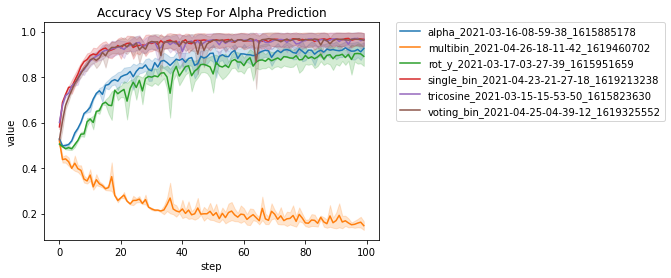

In [42]:
sns.lineplot(data=acc_all_orien, x="step", y="value", hue= converter_type).set_title("Accuracy VS Step For Alpha Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Processing Rot_Y (predcition type) Data

In [56]:
rot_y_run["tag"].unique()

array(['epoch_loss', 'epoch_orientation_accuracy',
       'evaluation_loss_vs_iterations',
       'evaluation_orientation_accuracy_vs_iterations'], dtype=object)

In [57]:
_acc_all_orien = rot_y_run[rot_y_run['tag'] == 'epoch_orientation_accuracy']
_converter_type = _acc_all_orien.run.apply(lambda run: run.split("\\")[1])

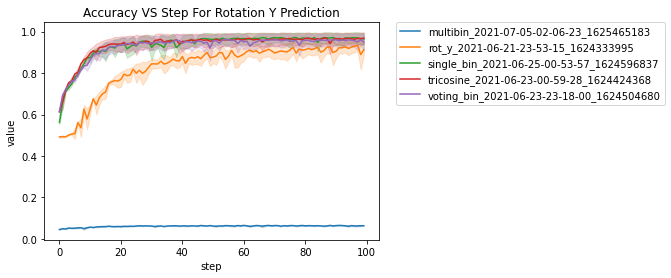

In [58]:
sns.lineplot(data=_acc_all_orien, x="step", y="value", hue= _converter_type).set_title("Accuracy VS Step For Rotation Y Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)